In [1]:
source("~/public/SiyuanLuo/projects/benchmark/scripts/evaluation/lib_metrics.R")
source("~/public/SiyuanLuo/projects/benchmark/scripts/clustering/lib_clustering.R")
source("utils.R")

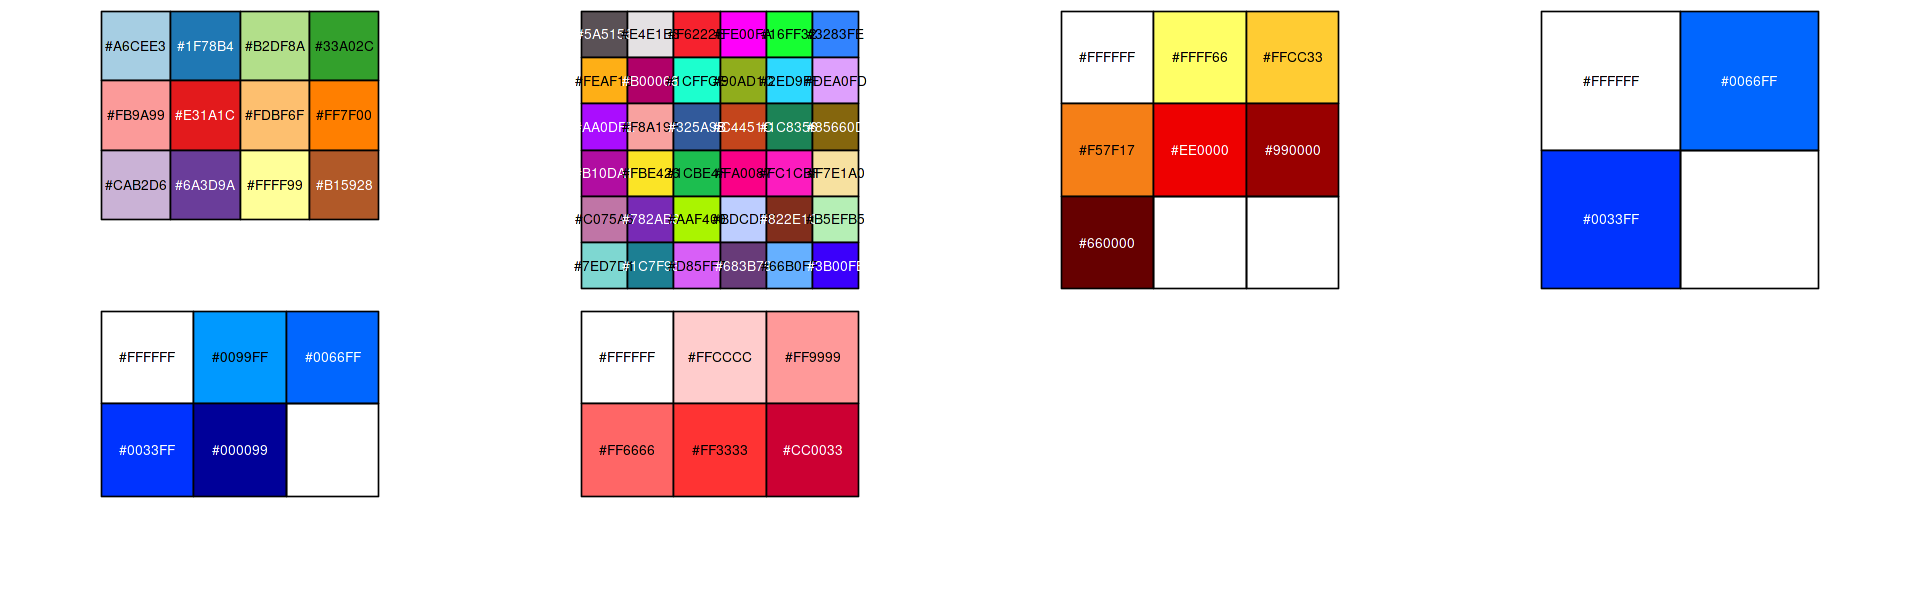

In [2]:
options(repr.plot.width=16, repr.plot.height=5)
par(mfrow=c(2,4))

show_col(my_col_m)
show_col(my_col_c)
show_col(my_color)
show_col(my_color_2)
show_col(my_color_3)
show_col(my_color_4)

In [24]:
dataset_ls <- c("Cell_line_mixing", "candidate1",  "candidate2", "Buenrostro_2018",  "Chen_2019",  "PBMC_multiomics") 
dataset_name <- c("Cell line", "Atlas1", "Atlas2",  "Buenrostro2018", "Chen2019", "10XPBMC")
k_ls <- c(10, 13, 10, 9, 13, 15)
size <- c(18538, 20204, 15301, 1711, 5199, 8560)

In [14]:
df_bm <- read.table("results_complexity.tsv", sep='\t', header = TRUE)

In [10]:
log10_minor_break = function (...){
  function(x) {
    minx         = floor(min(log10(x), na.rm=T))-1;
    maxx         = ceiling(max(log10(x), na.rm=T))+1;
    n_major      = maxx-minx+1;
    major_breaks = seq(minx, maxx, by=1)
    minor_breaks = 
      rep(log10(seq(1, 9, by=1)), times = n_major)+
      rep(major_breaks, each = 9)
    return(10^(minor_breaks))
  }
}

In [20]:
df_labels <- data.frame(dataset=df_bm$dataset, n_cells=df_bm$n_cells, method=df_bm$method, y=rep(6000, 6))

`geom_smooth()` using formula = 'y ~ x'


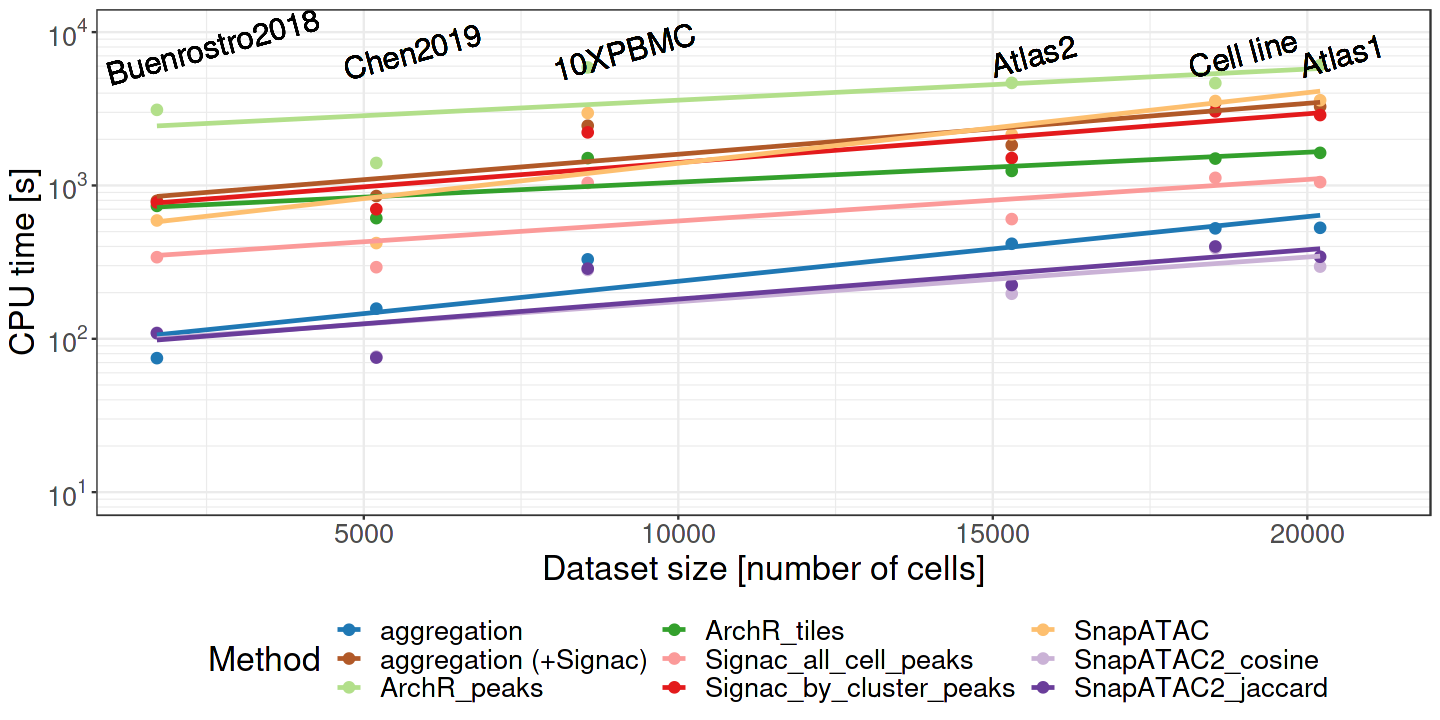

In [16]:
options(repr.plot.width=12, repr.plot.height=6)
df_bm$dataset <- factor(df_bm$dataset)
df_bm$method <- factor(df_bm$method)

ps <- df_bm %>% ggplot(aes(x=n_cells, y=s, color=method, group=method)) +
geom_point(size=2.5) + 
geom_smooth(method = "lm", se = FALSE) +
scale_colour_manual(values = brewer.pal(12, "Paired")[c(2, 12, 3:6,7,9:10)]) +
scale_y_continuous(trans = 'log10',
                   breaks = trans_breaks('log10', function(x) 10^x, n=3),
                   labels = trans_format('log10', math_format(10^.x)), 
                   limits=c(10, 10000),
                   minor_breaks=log10_minor_break()) +
theme_bw() + xlim(NA, 21000) +
theme(text = element_text(size = 20), legend.position = "bottom", legend.box="vertical") + 
labs(x="Dataset size [number of cells]", y="CPU time [s]", color='Method') +
geom_text(data=df_labels, 
          mapping = aes(label=dataset, x = n_cells, y = y), 
          inherit.aes = FALSE,
          angle=15, vjust=0.3, hjust=0.23, size=6.5) +
  guides(color=guide_legend(nrow=3, byrow=FALSE)) 
ps

`geom_smooth()` using formula = 'y ~ x'


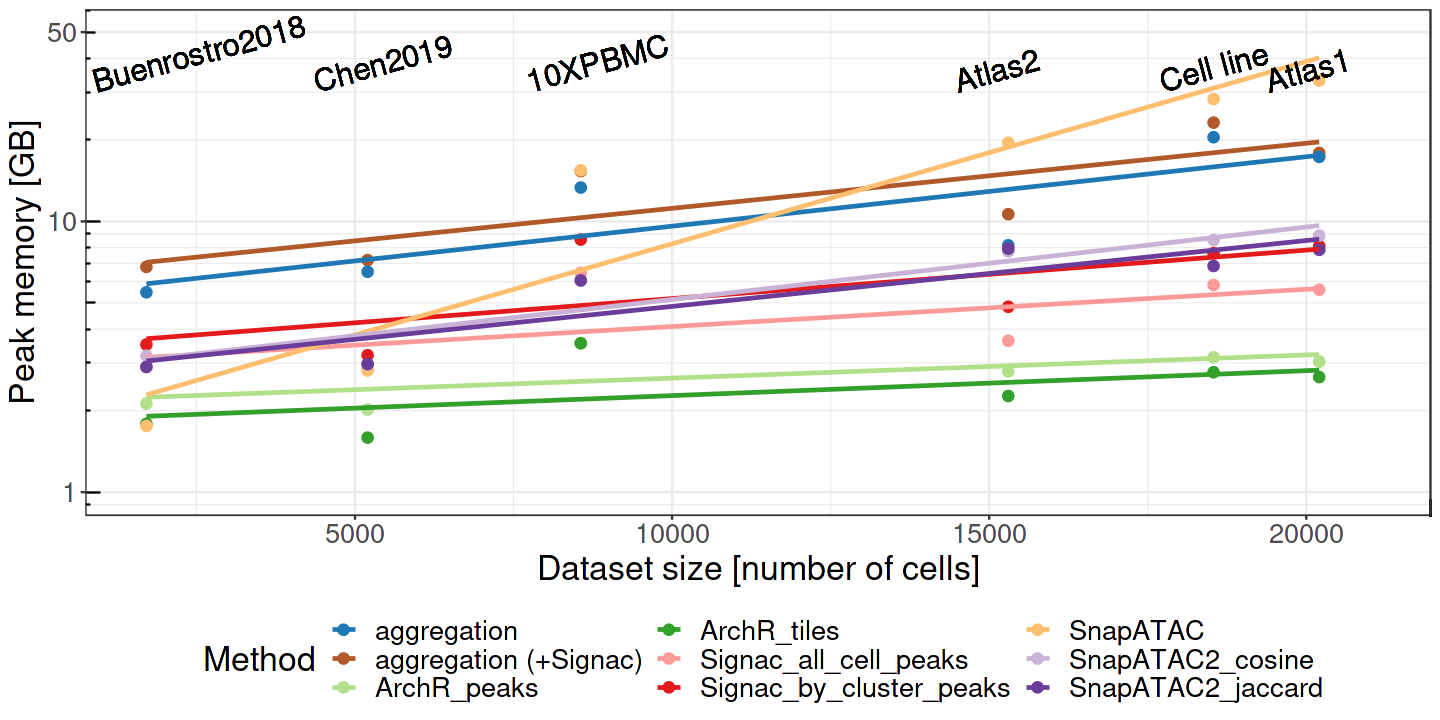

In [21]:
options(repr.plot.width=12, repr.plot.height=6)
df_bm$dataset <- factor(df_bm$dataset)
df_bm$method <- factor(df_bm$method)
p2s <- df_bm %>% ggplot(aes(x=n_cells, y=max_pss, color=method, group=method)) +
geom_point(size=2.5) + 
geom_smooth(method = "lm", se = FALSE) +
scale_colour_manual(values = brewer.pal(12, "Paired")[c(2,12,3:6,7, 9:10)]) +
scale_y_continuous(trans = 'log10',
                   breaks = c(1000, 10000, 50000),
                   labels = c("1", "10", "50"), 
                   limits=c(1000, 50000),
                   minor_breaks=log10_minor_break()) +
theme_bw() +
theme(text = element_text(size = 20), legend.position = "bottom", legend.box="vertical") + 
labs(x="Dataset size [number of cells]", y="Peak memory [GB]", color='Method') +
annotation_logticks(base = 10) +
geom_text(data=df_labels, 
          mapping = aes(label=dataset, x = n_cells, y = y), 
          inherit.aes = FALSE,
          angle=15, vjust=-8.5, hjust=0, size=6.5) +
  guides(color=guide_legend(nrow=3, byrow=FALSE))  +
          xlim(NA, 21000)
p2s

In [23]:
pdf("complexity_time.pdf", width=12, height=6)
print(ps)
dev.off() 
pdf("complexity_memory.pdf", width=12, height=6)
print(p2s)
dev.off() 

`geom_smooth()` using formula = 'y ~ x'


png 
  2

`geom_smooth()` using formula = 'y ~ x'


png 
  2